x*log(x)/log(10) - 1/2
verbose 0 (3899: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 67 points.
verbose 0 (3899: plot.py, generate_plot_points) Last error message: 'Unable to compute f(-0.009915326757779962)'


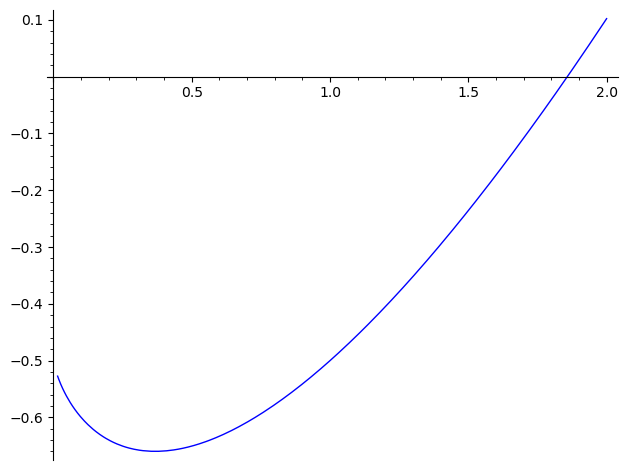

In [3]:
x = var('x')

y = x * log(x, 10) -1/2
print(y)
show(y.plot(xmax=2))

Значение в точке 0 неопределено, и достоверно известно, что меньше ноля при `x<=1`. Поэтому начнем искать решения начиная с `x = 1`

In [4]:
differential = diff(y, x)

Очевидно, что производная при x>=1 больше ноля. => корень единственный. Отделим его

In [5]:
current_point = 1
step = 0.1
root_borders = [current_point, 10000000000]

while y(x = current_point) < 0:
    root_borders[0] = current_point
    current_point += step

root_borders[1] = current_point

root_borders


[1.80000000000000, 1.90000000000000]

In [6]:
second_differential = diff(y, x, 2)

tangent_method_sign = 0
chord_method_sign = 0

if sign(y(x=root_borders[0])) == sign(second_differential(x=root_borders[0])):
    print("Метод касательных слева, метод хорд справа")
    tangent_method_sign = sign(y(x=root_borders[0]))
    chord_method_sign = - tangent_method_sign
elif sign(y(x=root_borders[1])) == sign(second_differential(x=root_borders[1])):
    print("Метод касательных справа, метод хорд слева")
    tangent_method_sign = sign(y(x=root_borders[0]))
    chord_method_sign = - tangent_method_sign


Метод касательных справа, метод хорд слева


In [7]:
def tangent_method():
    epsilon = float(input("Введите желаемую точность"))
    func = x - y/differential
    if tangent_method_sign == 1:
        starting_point = root_borders[0]
    else:
        starting_point = root_borders[1]

    prev_value = func(x = starting_point)
    while True:
        next_value = func(x = prev_value)
        if abs(next_value-prev_value) < epsilon:
            print(f"Ответ: {RR(next_value)}")
            break
        prev_value = next_value

tangent_method()

Ответ: 1.85816075924170


In [8]:
def chord_method():
    epsilon = float(input("Введите желаемую точность"))
    tangent_func = x - y/differential
    if tangent_method_sign == 1:
        tangent_starting_point = root_borders[0]
        chord_starting_point = root_borders[1]
    else:
        tangent_starting_point = root_borders[1]
        chord_starting_point = root_borders[0]

    prev_tangent = tangent_starting_point
    prev = chord_starting_point

    while True:
        next = prev - y(x=prev)*(prev_tangent-prev)/(y(x=prev_tangent)-y(x=prev))

        if abs(next-tangent_func(x=prev_tangent)) < epsilon:
            print(f"Ответ: {RR(next)}")
            break
        else:
            prev = next
            prev_tangent = tangent_func(x=prev_tangent)

chord_method()


Ответ: 1.85816074014318


In [27]:
ideal = solve(y == 0, x, solutions_dict=True)
print(ideal)

[
x == 1/2*log(10)/log(x)
]


In [28]:
etalon = 1.8581607592416981736911452118211005983110